In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/Gaby-gif/FinancialsBI/refs/heads/main/Financials_Time_Series.csv'
data = pd.read_csv(url, index_col='Date', sep=';')
# Load dataset (assuming you have the Air Passenger dataset on Kaggle)
# If using the built-in dataset from statsmodels
data = data['Sales'].replace('[\ ,]','', regex=True).astype(float)
# Reparse l'index avec le bon format
data.index = pd.to_datetime(data.index, format='%d/%m/%Y')

In [3]:
data

Date
2013-09-01      823500.0
2013-09-01    23640000.0
2013-09-01    53445000.0
2013-09-01     4083750.0
2013-09-01    74190600.0
                 ...    
2014-12-01     2967000.0
2014-12-01      932280.0
2014-12-01      498100.0
2014-12-01      932280.0
2014-12-01      498100.0
Name: Sales, Length: 700, dtype: float64

In [12]:
data = data.groupby(data.index).sum()

In [48]:
model = ARIMA(data, order=(5,1,2))
model_fit = model.fit()

In [49]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   16
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -311.852
Date:                Mon, 09 Jun 2025   AIC                            639.703
Time:                        22:52:48   BIC                            645.368
Sample:                    09-01-2013   HQIC                           639.643
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1603      0.396     -0.405      0.685      -0.936       0.615
ar.L2         -0.8319      0.267     -3.116      0.002      -1.355      -0.309
ar.L3         -0.7349      0.462     -1.589      0.1

In [52]:
# Make predictions
predictions = model_fit.predict(start=len(data), end=len(data)+11, typ='levels')
print(predictions)

2015-01-01    8.299936e+08
2015-02-01    9.012492e+08
2015-03-01    5.904260e+08
2015-04-01    1.054757e+09
2015-05-01    8.966033e+08
2015-06-01    9.785939e+08
2015-07-01    8.292321e+08
2015-08-01    9.252089e+08
2015-09-01    7.311011e+08
2015-10-01    8.639490e+08
2015-11-01    9.376418e+08
2015-12-01    1.018610e+09
Freq: MS, Name: predicted_mean, dtype: float64


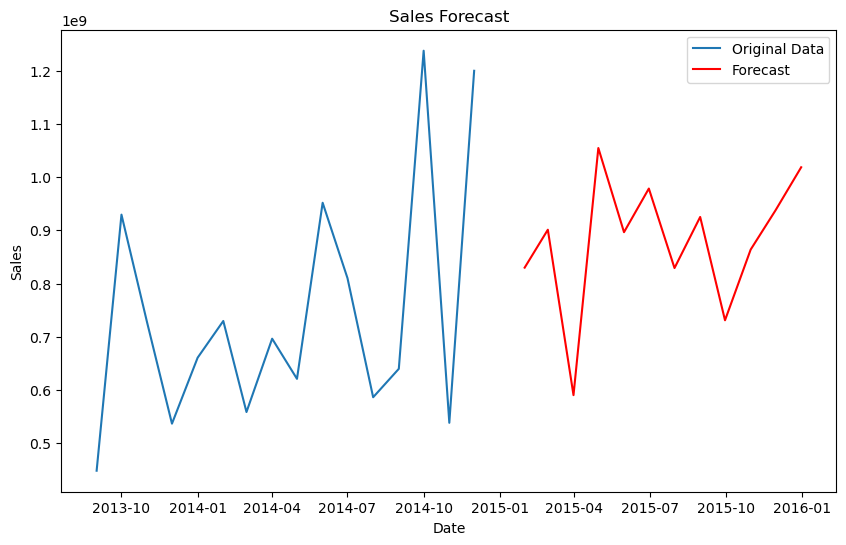

In [58]:
# Plot the actual data and forecast
plt.figure(figsize=(10,6))
plt.plot(data, label='Original Data')
plt.plot(pd.date_range(data.index[-1], periods=13, freq='M')[1:], predictions, color='red', label='Forecast')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()